# Importing lib

## data analysis lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## machine learning lib

In [2]:
import sklearn as sk

## reading dataframe

In [3]:
df= pd.read_csv("housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA - for understanding the data

In [5]:
# onlu numerical columns list
numerical_columns = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

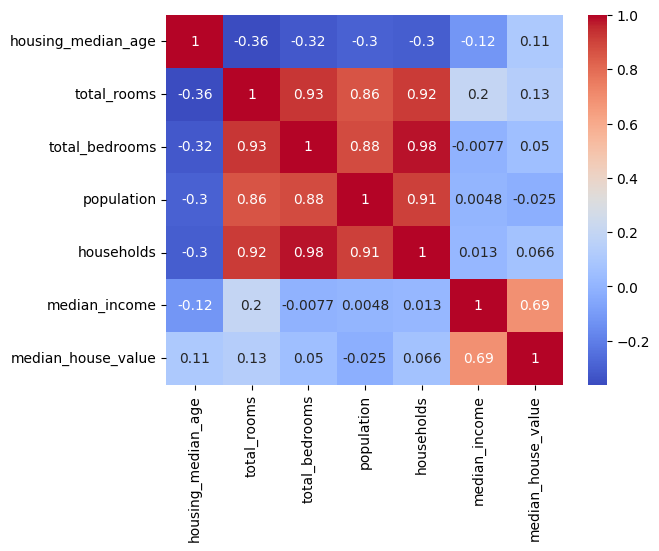

In [6]:
sns.heatmap(data=df[numerical_columns].corr(),annot=True,cmap='coolwarm')
plt.show()

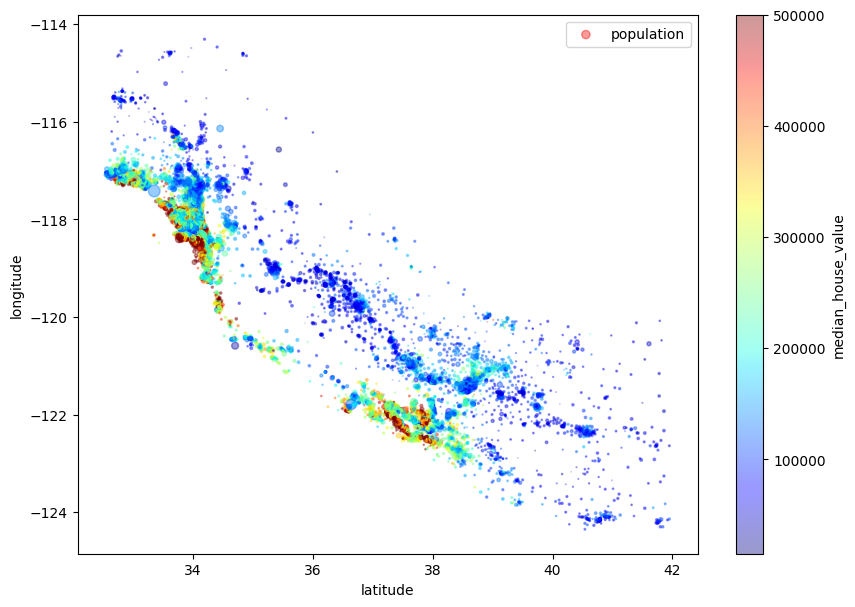

In [7]:
df.plot(
    kind='scatter',
    x='latitude',
    y="longitude",
    alpha=0.4,
    s=df['population']/500,
    label = 'population',
    c="median_house_value",
    figsize=(10,7),
    cmap=plt.get_cmap("jet"),
    colorbar=True
)
plt.show()

In [8]:
df.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


## adding neend columns

In [11]:
# This is called stratified shuffle split 

df['median_income'] = np.ceil(df['median_income'] /1.5 )
df['median_income'] = df['median_income'].where(df['median_income']<5,5)

In [12]:
# df['median_income'].value_counts()

In [13]:
df['bedroom_per_peson'] = df['total_bedrooms'] / df['households']
df['rooms per person'] =  df['total_rooms'] / df['population']

## processing data for machine
converting text columns into number and one hote encoding

In [44]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
bedroom_per_peson             0
rooms per person              0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [15]:
df['bedroom_per_peson'] = df['bedroom_per_peson'].fillna(df['bedroom_per_peson'].median())

In [16]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [17]:
df = pd.get_dummies(df,columns=['ocean_proximity'],drop_first=True)

## Train test split

In [18]:
x = df.drop(columns='median_house_value')
y = df['median_house_value']

In [19]:
xtrain,ytrain,xtest,ytest = sk.model_selection.train_test_split(x,y,random_state=42,test_size=0.2)

In [20]:
print("xtrain ",xtrain.shape)
print("xtest", xtest.shape)
print(ytrain.shape, ytest.shape)

xtrain  (16512, 14)
xtest (16512,)
(4128, 14) (4128,)


## Scaling the data

In [21]:
scaler = sk.preprocessing.MinMaxScaler()

In [45]:
scaled_df = scaler.fit_transform(xtrain)

## applying model

In [46]:
lr = sk.linear_model.LinearRegression()

In [47]:
lr.fit(xtrain,xtest)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## testing model accuracy

In [48]:
# predicting the using ytest
scaled_ytrain  = scaler.transform(ytrain)
prediction = lr.predict(scaled_ytrain)

C:\Users\deves\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
sk.metrics.r2_score(prediction,ytest)

-9407.82000027495

In [50]:
prediction

array([-2688071.31389101, -2683084.97736411, -2631244.38958657, ...,
       -2596957.23546529, -2687092.38297977, -2627934.55997289])

In [51]:
ytest

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64

In [ ]:
sk.metrics.mean_squared_error()

In [25]:
sampledata = xtrain.iloc[0:5]
samplelables = xtest.iloc[0:5]

a = lr.predict(sampledata)
for i in range(len(a)):
    print(round(a[i]),"->",samplelables.iloc[i])


209544 -> 103000.0
300620 -> 382100.0
254378 -> 172600.0
149529 -> 93400.0
188977 -> 96500.0
